# Exercise 4 - Discrete Fourier Analysis and Synthesis of Signals

## Objectives
- To learn that any periodic signal can be constructed using a linear combination of sinusoidal waves
- To introduce the Discrete Fourier Transform (DFT)
- To understand the difference between amplitude and phase in the frequency-domain 



In [1]:
import os
os.makedirs('results/ex4', exist_ok=True)

## Lab Exercise

### Sinusoidal Signals
We have seen how Python can manipulate data stored as a $1\times128$ vector. Now let us create a matrix `S` containing 10 rows of sine waves such that the first row is frequency $f$, the second row is the second harmonic $2f$ and so on. In this case, `Nsamp` = 128, `fsig` = 1000 and `fsamp` = 25600.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import sinegen

fs = 8000
fsig = 150
Nsamp = 100


S = []
for i in np.arange(0, 10):
    t, x = sinegen(fs, (i+1)*fsig, Nsamp)
    S.append(x)

Next, let us explore what happens when we add all the harmonics together. This can be done by first creating a row vector `p` containing 'ones', and then multiplying this with the matrix `S`:

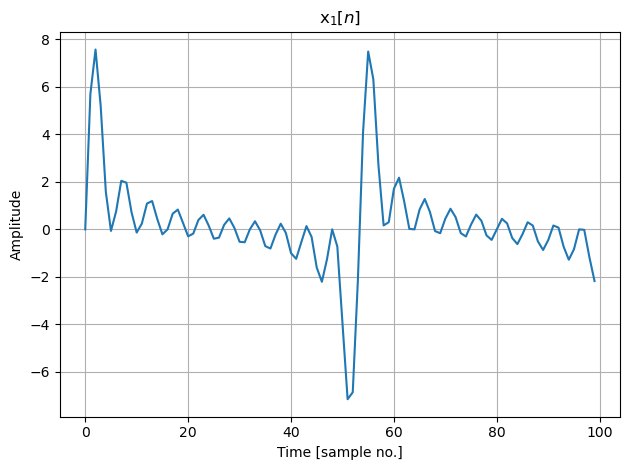

In [4]:
from functions.lab_functions import plot_signal

p = np.ones(10)
x1 = p.dot(S)

plt = plot_signal(x1, title='x$_1[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

>**GTA Tip**:
>
>The `np.dot(a, b)` command performs the dot product of two arrays. 

This is equivalent to calculating:
$$x_1[n]=\sum_{k=1}^{10}\sin(k \Omega n),$$

where $\Omega=2\pi\frac{f}{f_s}$ is the normalised angular fundamental frequency and $n=\{0,\:1,\:2,\cdots,\:\text{Nsamp}-1\}$.




**Question 4.1**: Explain the result $x_1[n]$.




---

**When you multiply a 1x10 vector with a 10xn matrix you get a 1xn result x[n] out**

---

Instead of using a unity row vector, we could choose a different weight $b[k]$ for each harmonic component in the summation:
$$x_2[n]=\sum_{k=1}^{10}b[k]\sin(k \Omega n).$$

**Question 4.2** Try $b[k] = \big[1,\: 0,\: 1/3,\: 0,\: 1/5,\: 0,\: 1/7,\: 0,\: 1/9,\: 0\big]$ and observe what we get.

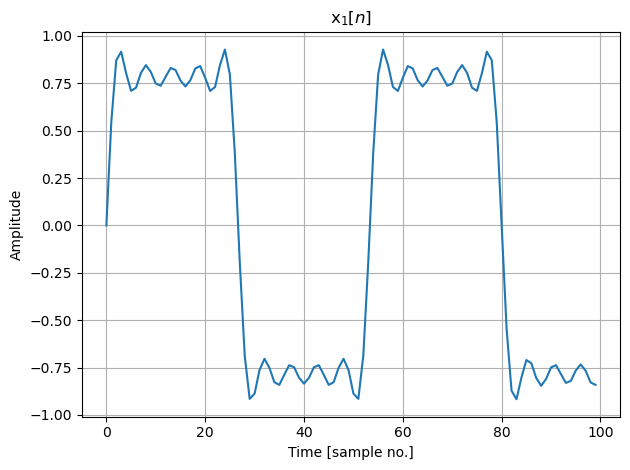

In [5]:
# add code here
from functions.lab_functions import plot_signal
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import sinegen

fs = 8000
fsig = 150
Nsamp = 100

S = []
for i in np.arange(0, 10):
    t, x = sinegen(fs, (i+1)*fsig, Nsamp)
    S.append(x)

b = [1,0,1/3,0,1/5,0,1/7,0,1/9,0]
x1 =np.dot(b,S)

plt = plot_signal(x1, title='x$_1[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 4.3** Let us see what we get for $x_2[n]$ with $b[k] = \big[1,\: -1/2,\: 1/3,\: -1/4,\: 1/5,\: -1/6,\: 1/7,\: -1/8,\: 1/9, \:0\big]$.

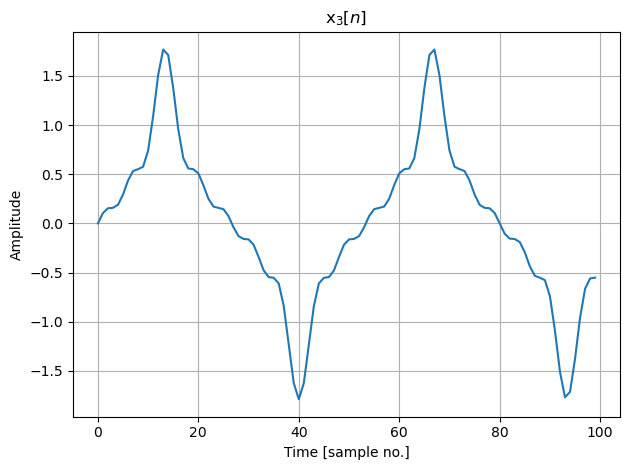

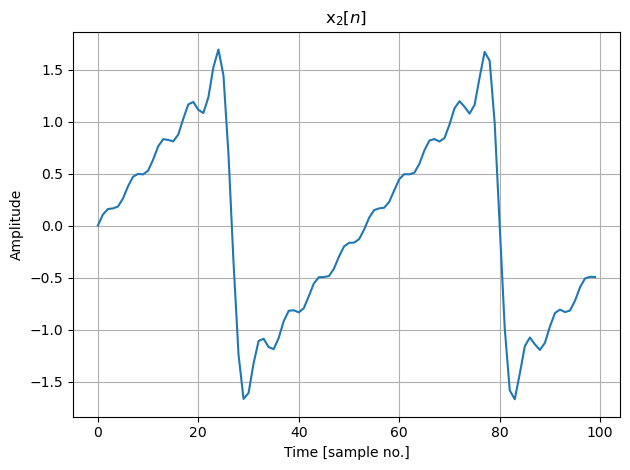

In [20]:
# add code here
from functions.lab_functions import plot_signal
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import sinegen

fs = 8000
fsig = 150
Nsamp = 100

S = []
for i in np.arange(0, 10):
    t, x = sinegen(fs, (i+1)*fsig, Nsamp)
    S.append(x)

b = [1, -1/2,1/3,-1/4, 1/5, -1/6, 1/7, -1/8, 1/9, 0]
a = [1,0, -1/3, 0, 1/5, 0, -1/7,0,1/9, 0]

x2 =np.dot(b,S)
x3 = np.dot(a,S)

plt = plot_signal(x3, title='x$_3[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt = plot_signal(x2, title='x$_2[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 4.4 (Optional)**: You may want to derive the results for $x_2[n]$ with $b[k] = \big[1,\: -1/2,\: 1/3,\: -1/4,\: 1/5,\: -1/6,\: 1/7,\: -1/8,\: 1/9, \:0\big]$ from first principles.


So far, we have used sine waves as basis functions. Let us now try using cosine signals. First, create a `cosgen` function and use it to generate a $10\times 128$ matrix `C` with 10 harmonically-related cosine waveforms. 


**Question 4.5** Now, use the weight vector $a[k] = \big[1,\: 0,\: -1/3,\: 0,\: 1/5,\: 0,\:  -1/7,\: 0,\: 1/9,\: 0\big]$, to compute `x3=ak*C` and plot the result of:
$$x_3[n]=\sum_{k=1}^{10}a[k]\cos(k \Omega n).$$

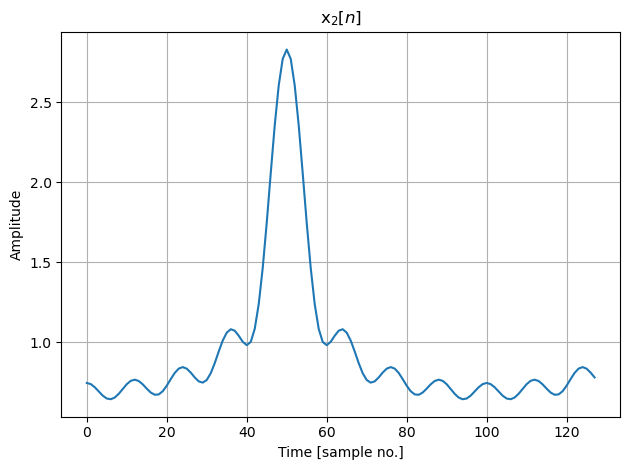

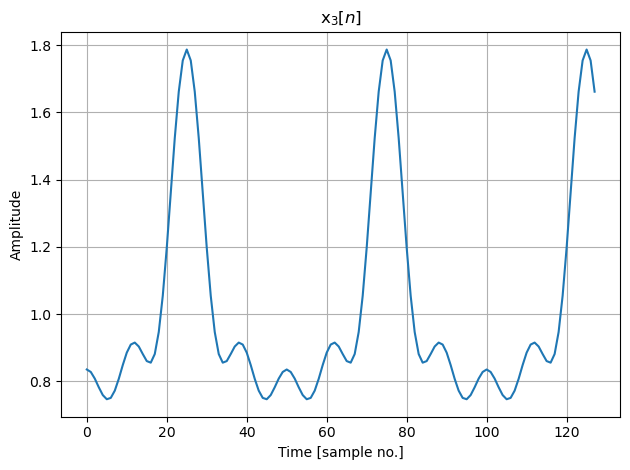

In [18]:
# add code here
from functions.lab_functions import plot_signal
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import sinegen

def cosHarmonics(mult, Nsam, Omega):

    x = []

    for n in range(0,Nsam):
        x.append(np.cos(Omega*n*mult))

    return x

def cosgen(fsig, fs):
    
    Nsam = 128
    x = []
    Omega = 2*np.pi* (fsig/fs)

    for i in range(0,10) :
        x.append(cosHarmonics(i, Nsam, Omega))
    
    return x
    

fs = 100000
fsig = 1000
Nsamp = 100000

y = cosgen(fsig, fs)

b = [1,0, -1/3, 0, 1/5, 0, -1/7,0,1/9, 0]
a = [1, -1/2,1/3,-1/4, 1/5, -1/6, 1/7, -1/8, 1/9, 0]
x3 =np.dot(b,y)
x2 = np.dot(a,y)
plt = plot_signal(x2, title='x$_2[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt = plot_signal(x3, title='x$_3[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 4.6**: How does $x_3[n]$ differ from $x_2[n]$ obtained earlier using sine waves? What general conclusions on the even and odd symmetry of the signal can you draw?

---

**Observation :** It seems as though when you use an odd signal like sine, you get an odd signal out - which is obvious since the sum of odd functions is an odd function. Thus the useage of the cosine in x3 gives a symmetric even function.

When comparing both masking functions with the cosine versions of x2 and x3, x3 turns out to have more peaks whilst x2 dies down faster.

---

**Question 4.7 (Optional)**:  Prove that $x[n]=a[0] + \sum^{\infty}_{k=1}a[k]\cos(\frac{2\pi}{N}kn) + \sum^{\infty}_{k=1}b[k]\sin(\frac{2\pi}{N}kn)$ is equivalent to $x[n]=\sum^{\infty}_{k=-\infty}A[k]e^{j\frac{2\pi}{N}kn}$. How can the coefficients $A[k]$ be determined? 

>**GTA Tip**
>
>Recall that $\sin(\theta) = -\frac{1}{2}je^{j\theta} + \frac{1}{2}je^{-j\theta}$ and $\cos(\theta) = \frac{1}{2}e^{j\theta}+ \frac{1}{2}e^{-j\theta}$.

---


#### Proof




1. **Starting Expression**:
   $$ x[n] = a[0] + \sum^{\infty}_{k=1}a[k]\cos\left(\frac{2\pi}{N}kn\right) + \sum^{\infty}_{k=1}b[k]\sin\left(\frac{2\pi}{N}kn\right) $$

2. **Applying Euler's Formula**:
   Using Euler's formula, we can express $\cos$ and $\sin$ in terms of exponentials:
   $$ \cos\left(\frac{2\pi}{N}kn\right) = \frac{1}{2}\left(e^{j\frac{2\pi}{N}kn} + e^{-j\frac{2\pi}{N}kn}\right) $$
   $$ \sin\left(\frac{2\pi}{N}kn\right) = \frac{1}{2j}\left(e^{j\frac{2\pi}{N}kn} - e^{-j\frac{2\pi}{N}kn}\right) $$

3. **Substituting into the Expression**:
   Substituting these into $x[n]$, we get:
   $$ x[n] = a[0] + \sum^{\infty}_{k=1}\left( a[k]\frac{e^{j\frac{2\pi}{N}kn} + e^{-j\frac{2\pi}{N}kn}}{2} + b[k]\frac{e^{j\frac{2\pi}{N}kn} - e^{-j\frac{2\pi}{N}kn}}{2j} \right) $$

4. **Rearranging**:
   By rearranging terms, the expression becomes:
   $$ x[n] = a[0] + \sum^{\infty}_{k=1}\left( \frac{a[k] - jb[k]}{2}e^{j\frac{2\pi}{N}kn} + \frac{a[k] + jb[k]}{2}e^{-j\frac{2\pi}{N}kn} \right) $$

5. **Defining Coefficients $A[k]$**:
   Since $a[k]$ is even and $b[k]$ is odd :
   $$a[-k] = a[k] , \:\: b[-k] = -b[k]$$

   From this we can say that : 
   
   $$A[k] = \frac{a[k] - jb[k]}{2} \text{ for } k > 0 \text{ and } A[-k] = \frac{a[k] + jb[k]}{2} \text{ for } k > 0 \text{ Also, } A[0] = a[0]$$

6. **Final Form**:
   With these definitions, the expression becomes:
   $$ x[n] = \sum^{\infty}_{k=-\infty}A[k]e^{j\frac{2\pi}{N}kn} $$

**QED**

---

We observe a really important property of periodic signals using Fourier series analysis. Fourier series analysis states that any periodic function can be constructed using a weighted sum of harmonically-related sinusoids. This leads to the definition of the Discrete Fourier Series (DFS) for periodic signals:

---
**DFS (Discrete Fourier Series)**:
$$\text{Forward Transform: }X[k]=\sum^{N-1}_{n=0}x[n]e^{-j \frac{2\pi}{N} kn}, \quad k = 0,\pm1,\pm2,\cdots$$
$$\text{ Inverse Transform: }x[n]= \frac{1}{N}\sum^{N-1}_{k=0} X[k]e^{j \frac{2\pi}{N} kn} , \quad n = 0,\pm1,\pm2,\cdots$$

---

You should now be able to see that it is possible to construct $x[n]$ from a finite number of harmonics; the frequencies are $\Omega=\frac{2\pi}{N}k,$ where $k = 0, 1,\cdots,N-1$.

**Question 4.8**:  Derive the DFS of the periodic sequence  $x[n] = \{\cdots, \stackrel{\text{n=0}}{0}, \stackrel{}{1}, \stackrel{}{2}, \stackrel{}{3}, \stackrel{}{0}, \stackrel{}{1}, \stackrel{}{2}, \stackrel{}{3}, \stackrel{}{0}, \stackrel{}{1}, \stackrel{}{2}, \stackrel{}{3},\cdots\}$, where $N=4$ and the '$n=0$' denotes the $0^{\text{th}}$ sample. What do you notice about the periodicity of $X[k]$? 

---
## Derivation : 

$$X[k] = x[0]e^{-j\frac{2\pi}{4} \cdot 0 \cdot k} + x[1]e^{-j\frac{2\pi}{4} \cdot 1 \cdot k} + x[2]e^{-j\frac{2\pi}{4} \cdot 2 \cdot k} + x[3]e^{-j\frac{2\pi}{4} \cdot 3 \cdot k}$$

Substituting the values from \( x[n] \), we get:

$$X[k] = 0 \cdot e^{-j\frac{2\pi}{4} \cdot 0 \cdot k} + 1 \cdot e^{-j\frac{2\pi}{4} \cdot 1 \cdot k} + 2 \cdot e^{-j\frac{2\pi}{4} \cdot 2 \cdot k} + 3 \cdot e^{-j\frac{2\pi}{4} \cdot 3 \cdot k}$$

Simplifying further:

$$X[k] = e^{-j\frac{\pi}{2}k} + 2e^{-j\pi k} + 3e^{-j\frac{3\pi}{2}k}$$

Given the periodicity of the exponential function, $e^{-j\pi k}$ will alternate between $1$ and $-1$ as k varies, and $e^{-j\frac{\pi}{2}k}$ and $e^{-j\frac{3\pi}{2}k}$ will cycle through $\{1, -j, -1, j\}$. Therefore, $X[k]$ will be a periodic function of k with a period of 4, cycling through complex values depending on the value of  k modulo 4.

---

It should be evident that $X[k]$ is itself a (complex-valued) periodic sequence with a fundamental period equal to $N$, that is,

$$X[k+N]=X[k],$$

where $k$ is the harmonic or frequency bin index and $n$ is the sample index.

Recall that to perform the frequency analysis of a periodic signal, we take one cycle and perform the DFS. So what about non-periodic signals? If an infinitely long continuous-time domain signal is sampled to produce $x[n]$, the frequency-domain representation is given by what is called the Discrete-Time Fourier Transform (DTFT). This is defined as $X(e^{j\Omega})=\sum\limits_{n=-\infty}^{\infty}x[n]e^{-j\Omega n}$ and gives a continuous frequency-domain representation. 

However, it is not possible in practice to process an infinite number of samples. Therefore, we only take and analyse the frequency contents of a finite number of samples $N$ in practice. This leads to the Discrete Fourier Transform (DFT). The DFT is related to the DTFT via frequency-domain sampling at discrete frequencies $2\pi k/N$, $k = 0,1,\cdots N-1$ of the DTFT spectrum $X(e^{j\Omega})$, where $\Omega$ is the frequency-domain variable.

The equations for the Discrete Fourier Series (DFS) and the Discrete Fourier Transform (DFT) are surprisingly the same but the reasoning behind the periodicity is not. In the DFS, the time sequence is 'naturally' periodic whereas the periodicity of the DFT is enforced by frequency-domain sampling of $X(e^{j\Omega})$ (<em>recall Exercise 3 and the effects of sampling</em>). The full mathematical definition of the DFT is:

---
**DFT (Discrete Fourier Transform)**: $x[n] \rightarrow X[k]$
$$\text{Forward Transform: }X[k]=\sum^{N-1}_{n=0}x[n]e^{-j \frac{2\pi}{N} kn}, \quad k = 0, 1, 2,\cdots N-1 $$
$$\text{ Inverse Transform: }x[n]= \frac{1}{N}\sum^{N-1}_{k=0} X[k]e^{j \frac{2\pi}{N} kn} , \quad n = 0, 1, 2,\cdots N-1 $$

---

**Question 4.9**: Can the Fourier transform modify the energy of a signal?

---
**Answer :** No, the Fourier transform itself does not modify the energy of a signal. The energy of a signal is an inherent property of the signal, and the Fourier transform is a linear transformation that changes the domain of representation of the signal from time domain to frequency domain (or vice versa), without altering its energy content.

This property is expressed in Parseval's theorem, which states that the total energy of a signal is preserved in the frequency domain. 

$$\int_{-\infty}^{\infty} |x(t)|^2 dt = \int_{-\infty}^{\infty} |X(f)|^2 df$$

And for discrete-time signals:

$$\sum_{n=-\infty}^{\infty} |x[n]|^2 = \frac{1}{2\pi} \int_{-\pi}^{\pi} |X(e^{j\omega})|^2 d\omega$$


These theorems ensure that the total energy of the signal remains the same in both the time and frequency domains. The Fourier transform only redistributes this energy across frequencies, providing a different perspective on the signal's characteristics but not altering its inherent energy.

---

**Question 4.10**: When applying Fourier analysis to a signal, under which circumstances should a DFS be employed and under which circumstances should a DFT be employed?

> In Python we use the `fft` function to calculate the DFT. The Fast Fourier Transform (FFT) is just a fast algorithm that is used to calculate the DFT. 

---
**Answer** : A DFS would be suitable when you aim to represent a given signal as the sum of complex sinusoids with varying coefficents and increasing harmonics frequencies present in the signal - ie. you aim to express $x[n]$ in a different way but its still $x[n]$. A DFT would be suitable when you wish to represent the frequency spectra of a given time signal which then isnt the same as $x[n]$.

---

Now let us find the DFT spectrum of the sine wave produced by running the following code:

In [6]:
from scipy.fft import fft

t, x_sin = sinegen(8000,1000,8) # 8000hz = f_sample, 1000Hz = f_sig, 8 = N
A = fft(x_sin)

Let us plot the results:

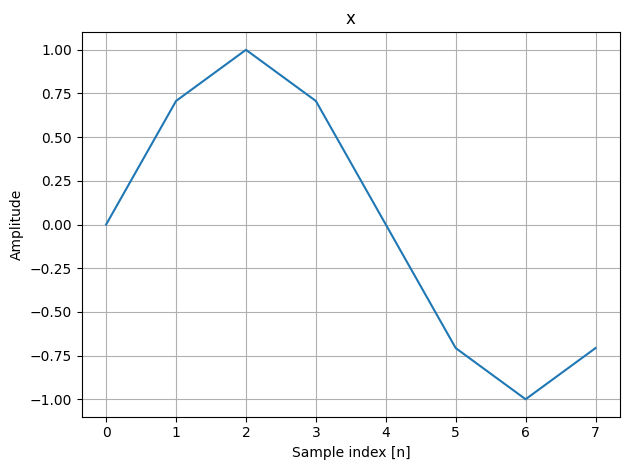

A: 
-0j
(-0-4j)
-0j
0j
-0j
-0j
0j
(-0+4j)


In [7]:
plt = plot_signal(x_sin, title='x', xlabel='Sample index [n]', ylabel='Amplitude')
plt.show()

print('A: ')
for i in A:
    print(np.round(i,1), end = '\n')

**Question 4.11**: Explain the numerical result in `A`. Make sure that you know the significance of each number in the output. Evaluate the DFT of a cosine signal. Is it what you would expect?


---

**Answer**

$$x[n] = \{sin(0), sin(\frac{\pi}{4}),sin(\frac{2 \pi}{4}),sin(\frac{3 \pi}{4}),sin(\frac{4 \pi}{4}),sin(\frac{5 \pi}{4}),sin(\frac{6 \pi}{4}),sin(\frac{7 \pi}{4})\}$$

$$x[n] = \{0, \frac{\sqrt{2}}{2}, 1, \frac{\sqrt{2}}{2}, 0, -\frac{\sqrt{2}}{2}, -1, \frac{\sqrt{2}}{2} \}$$

Then : 

$$X[k] = \frac{\sqrt{2}}{2} e^{\frac{-i\pi k}{4}} + e^{\frac{-i\pi k}{2}} - \frac{\sqrt{2}}{2} e^{\frac{-3i\pi k}{4}} - e^{\frac{-i\pi k}{2}} - \frac{\sqrt{2}}{2} e^{\frac{-5i\pi k}{4}}$$

**Since cosine is just sine with a phase shift, you can use the phase shift property of the fourier transform to easily adjust the current expression and obtain the DFT of X[k]**

---

**Question 4.12**: What is the frequency resolution, $\Delta F$, of a 256-point DFT when the sampling frequency is 1000 Hz?

>**GTA Tip**
>
>- The first sample of the DFT represents the DC component (0 Hz). 
>- The last sample  of the DFT represents the sampling frequency minus the frequency resolution ($f_s - \Delta F$).


---

**Answer**

The frequency resolution in a digital signal processing context refers to the smallest difference in frequencies that can be distinguished in the analysis of a signal. For a given sampled signal, the frequency resolution depends on the sampling rate and the length of the time window over which the Fourier transform (like the Discrete Fourier Transform, DFT) is computed.

Given:
- Sampling rate (or sampling frequency), $f_s$, which is the number of samples per second.
- Length of the time window,$T$, or the number of samples, $N$, used in the DFT.

The frequency resolution : 

$$\Delta f = \frac{f_s}{N}$$

In this case then : 

$$\Delta f = \frac{1000}{256} = 3.9$$

---

Instead of working with real and imaginary numbers of a complex number $A=b+jc$, where $b,c$ are real scalars and $j=\sqrt{-1}$, it is often more convenient to work with the magnitude and phase of the frequency components, as defined by:

>Magnitude, $|A|=\sqrt{b^2+c^2}$ and phase, $\angle{A}=\tan^{-1}\frac{c}{b}$.

We also define a `plot_spec(A)` function which plots the magnitude and phase spectra of `A`.

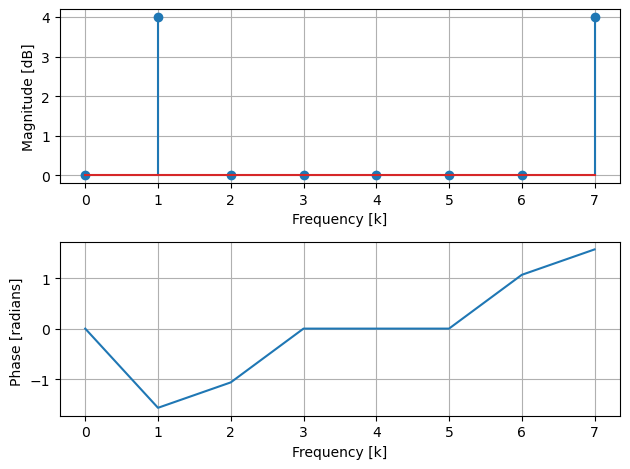

In [8]:
from functions.lab_functions import plot_spec

plt = plot_spec(A, func='stem')
plt.show()

### Dirac Delta and Rectangular Signals

Now, create a pulse signal with 8 samples of ones and 8 samples of zeros. Obtain its magnitude spectrum and verify that it is what you expect. 

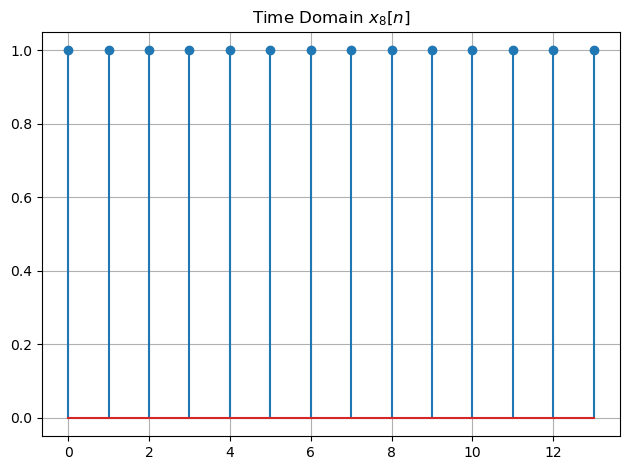

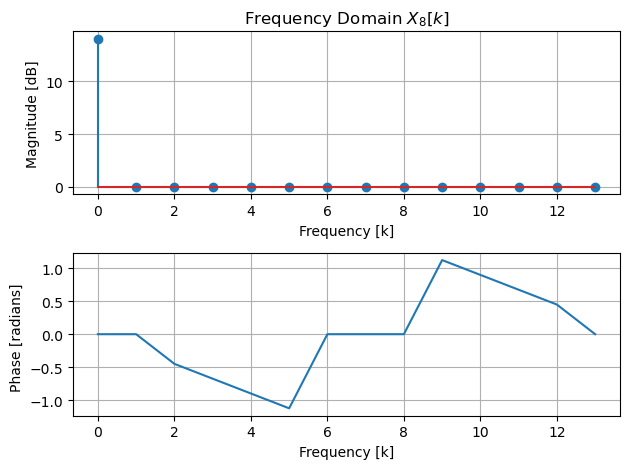

In [12]:
pulse_of_ones = np.ones(14) # Gradually reduce the width of the pulse until it becomes a unit impulse function
following_zeros = np.zeros(0)

x8 = np.concatenate((pulse_of_ones, following_zeros))
plt = plot_signal(x8, title='Time Domain $x_8[n]$', func='stem')
plt.show()

X8 = fft(x8)
plt = plot_spec(X8, title='Frequency Domain $X_8[k]$', func='stem')
plt.show()

Gradually reduce the width of the pulse until it becomes a unit impulse function, i.e. contains only a single one and 15 zeros. Observe the changes in the spectrum and make sure you can explain. 

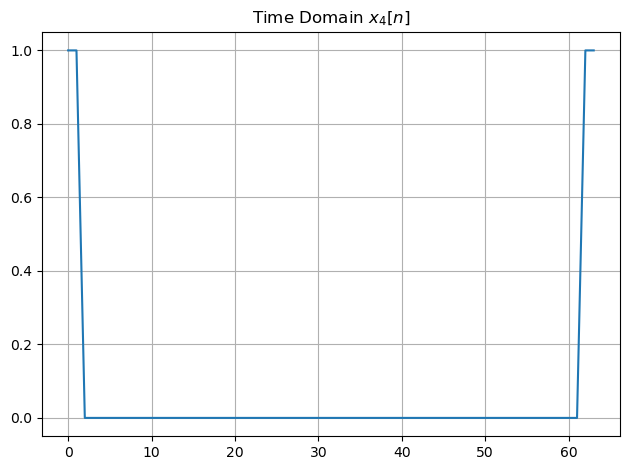

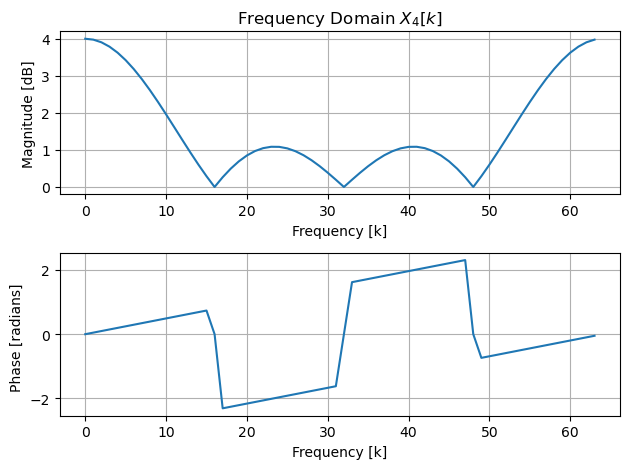

In [36]:
from functions.lab_functions import plot_signal
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import sinegen
from scipy.fft import fft
from functions.lab_functions import plot_spec

pulse_of_ones = np.ones(2) # Gradually reduce the width of the pulse until it becomes a unit impulse function
following_zeros = np.zeros(10)

x4 = np.concatenate((pulse_of_ones, following_zeros,following_zeros,following_zeros,following_zeros, following_zeros, following_zeros, pulse_of_ones))
plt = plot_signal(x4, title='Time Domain $x_4[n]$', func='plot')
plt.show()

X4 = fft(x4)
plt = plot_spec(X4, title='Frequency Domain $X_4[k]$', func='plot')
plt.show()

**Question 4.13**: What do these plots tell us about the frequency components that make up a unit impulse function?

---

**Answer**

When the DFT of the unit impulse function is plotted you get a horizontal line of magnitude 1 as the magnitude of the DFT. This means that a unit impulse function has a frequency range of $-\infty$ to $\infty$ this is expected as the unit impulse function is very steep. Furthermore, due to the duality of the fourier transform, if you consider a constant DC signal in the time domain (horizontal line) this signal would be of a single frequency since its constant - thus its fourier transform would be the unit impulse function in the frequency domain - indicating a single frequency in the signal.

---

Next, delay this unit impulse function by 1 sample and find its spectrum again. Examine the real and imaginary spectra. 

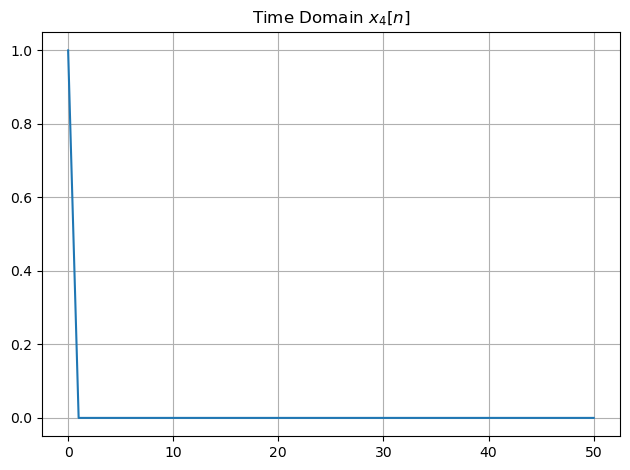

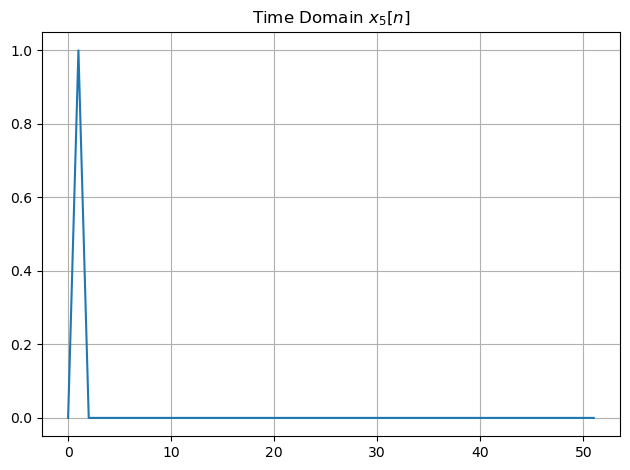

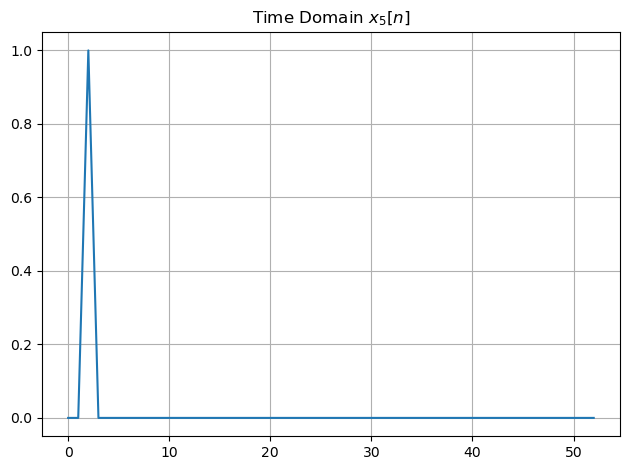

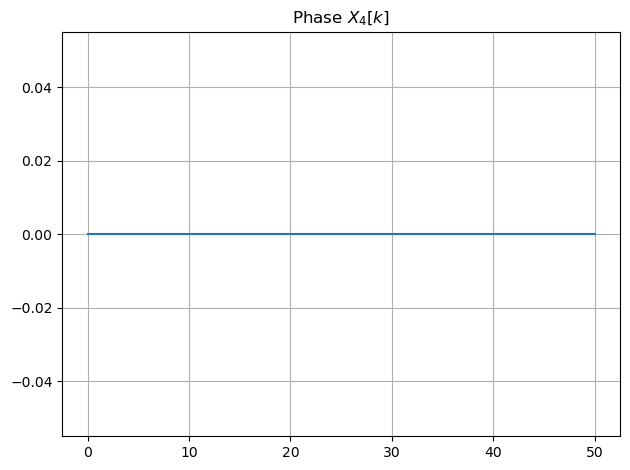

Phase Gradient :  0.0


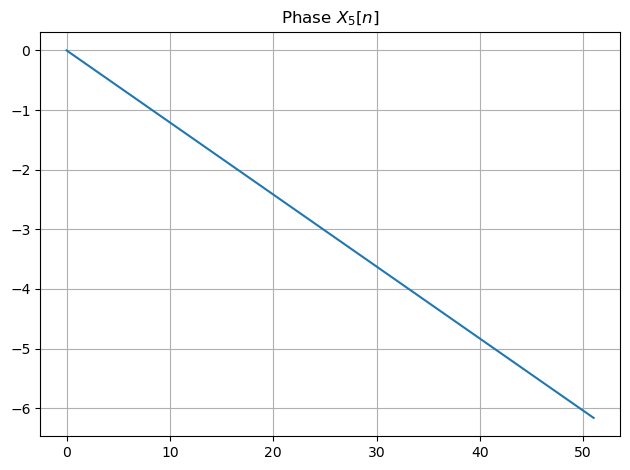

Phase Gradient :  0.03315613291203977


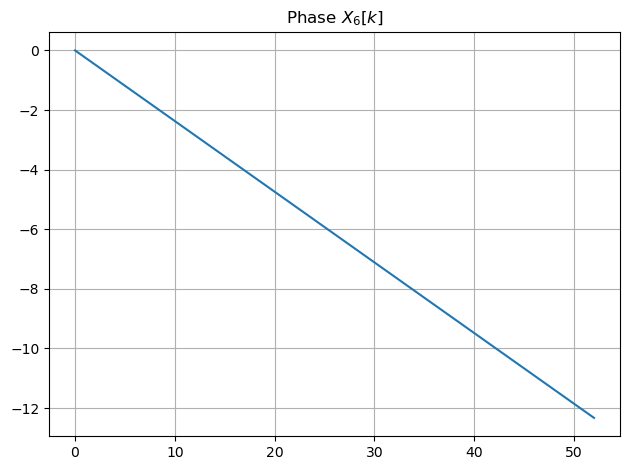

Phase Gradient :  0.049978041825439724


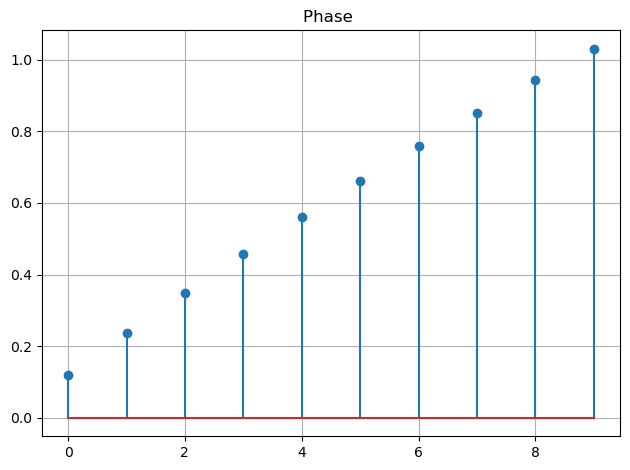

In [62]:
# add your code here
from functions.lab_functions import plot_signal
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import sinegen
from scipy.fft import fft
from functions.lab_functions import plot_spec

pulse_of_ones = np.ones(1) # Gradually reduce the width of the pulse until it becomes a unit impulse function
following_zeros = np.zeros(50)
delay_zeros = np.zeros(1)

####
def getPhase(X):

  phase = np.arctan2(np.imag(X), np.real(X))
  phase = np.unwrap(phase)

  return phase

def getGrad(x1,x2,Y):

  x = ( (Y[x2] - Y[x1])/(x2-x1) ) / 1
  return np.real(np.sqrt(x * np.conj(x)))

x4 = np.concatenate((pulse_of_ones, following_zeros))
plt = plot_signal(x4, title='Time Domain $x_4[n]$', func='plot')
plt.show()

x5 = np.concatenate((delay_zeros, pulse_of_ones, following_zeros))
plt = plot_signal(x5, title='Time Domain $x_5[n]$', func='plot')
plt.show()

x6 = np.concatenate((delay_zeros,delay_zeros, pulse_of_ones, following_zeros))
plt = plot_signal(x6, title='Time Domain $x_5[n]$', func='plot')
plt.show()

X4 = fft(x4)
plt = plot_signal(getPhase(X4), title='Phase $X_4[k]$', func='plot')
plt.show()
print('Phase Gradient : ' , getGrad(1,41,X4))

X5 = fft(x5)
plt = plot_signal(getPhase(X5), title='Phase $X_5[n]$', func='plot')
plt.show()
print('Phase Gradient : ' ,getGrad(1,41,X5))

X6 = fft(x6)
plt = plot_signal(getPhase(X6), title='Phase $X_6[k]$', func='plot')
plt.show()
print('Phase Gradient : ' ,getGrad(1,41,X6))

P = []

for i in range(1,11):

  pulse_of_ones = np.ones(1) # Gradually reduce the width of the pulse until it becomes a unit impulse function
  following_zeros = np.zeros(50)
  delay_zeros = np.zeros(i)
  x_i = np.concatenate((delay_zeros, pulse_of_ones, following_zeros))
  X_i = fft(x_i)
  phase = getPhase(X_i)
  gradient = getGrad(1,40+i,phase)
  P.append(gradient)

plt = plot_signal(P, title='Phase ', func='stem')
plt.show()



**Question 4.14**: What happens to the spectrum when the unit impulse function is delayed? What do you expect if you delay the impulse by 2 samples instead of 1? Investigate the phase of the delay (you may find the `np.unwrap` function useful).

---

**Answer**

When the signal is delayed, there is no change to the magnitude of the frequency response, however, the phase of the signal is decreasing due to the delay.

For a delayed unit impulse, its phase gradient is negative and increases in negativity (decreases/tends to - $\infty$) linearly as seen in the 'phase' plot which shows the phase gradient as a function of delay.

---

### Real World Example: ECG Signals

To test how much you have understood so far, you are given a real electrocardiogram (EGC) signal. The signal contains 500 data samples and sampled at a rate of 200 Hz. Our aim is to detect the heart rate of the patient from which this ECG was taken.

We first load the data into a vector using the Python command:

In [12]:
from functions.lab_functions import load

ecg = load('files/ecg.mat', 'ecg')

Then, plot the ECG signal:

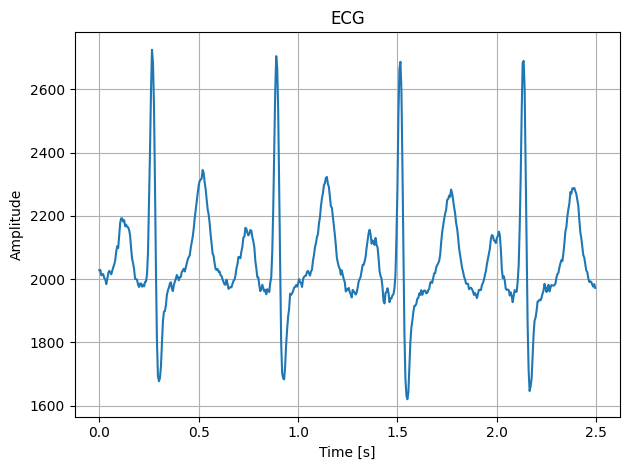

In [13]:
fsamp = 200
Nsamp = len(ecg)
Tsamp = 1/fsamp
t = np.arange(0, Nsamp*Tsamp, Tsamp)
      
plt = plot_signal(t, ecg, title='ECG', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

Now remove the DC component from the ECG signal by processing in the frequency-domain:

In [14]:
from scipy.fft import ifft

ECG = fft(ecg)
ECG[0] = 0 # remove the 0 Hz component 
ecg_no_dc = np.real(ifft(ECG))

**Question 4.15**: Can you think of a way of removing the DC component in the time domain without using the DFT? Try implementing this time-domain approach in Python.

C:\Users\dimas\AppData\Local\Temp\ipykernel_28348\2498756957.py:31: RuntimeWarning: overflow encountered in scalar subtract
  dy[-1] = (y[-1] - y[-2]) / h  # Backward difference for the last element


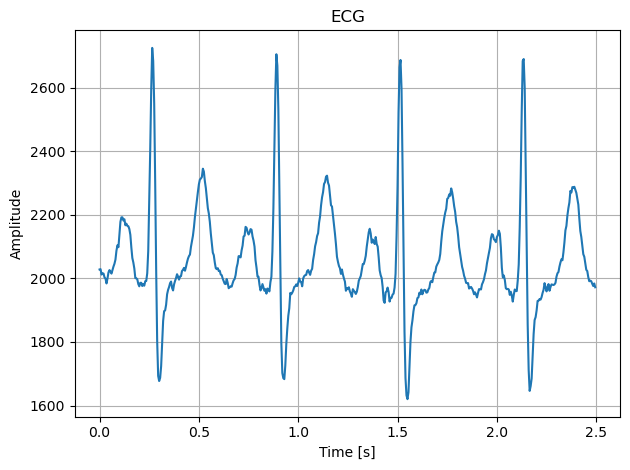

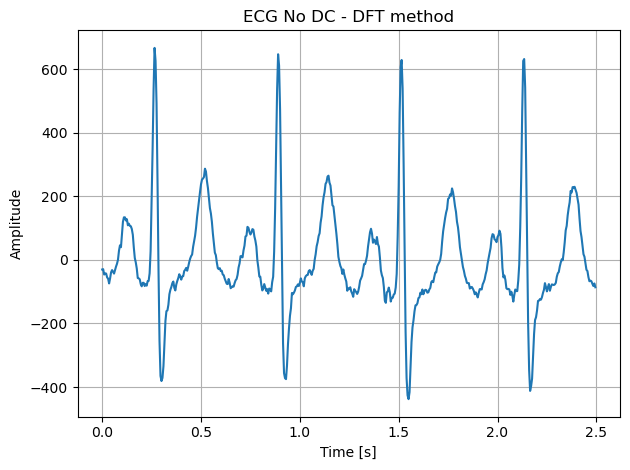

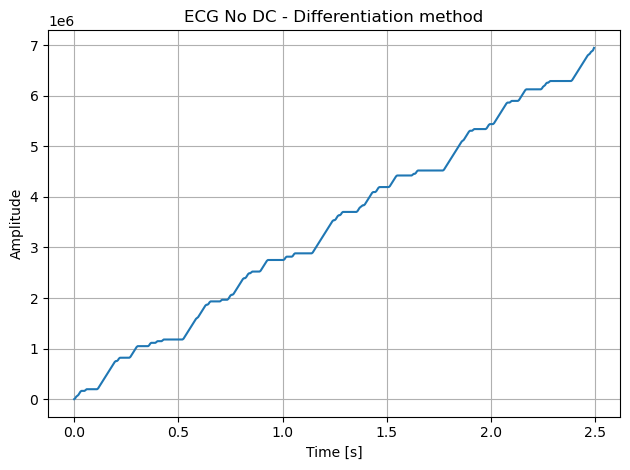

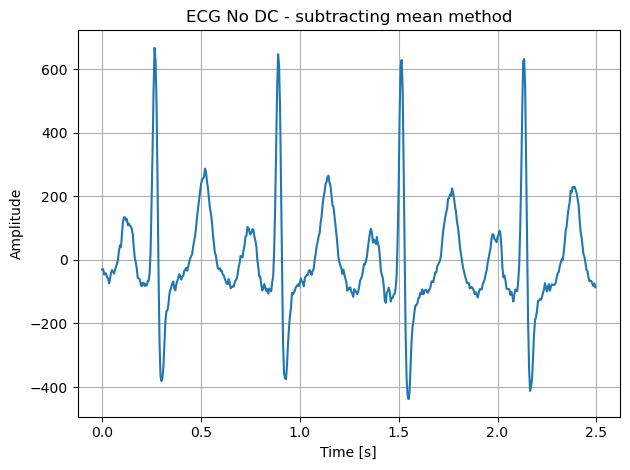

In [70]:
# add your code here
import numpy as np
from scipy.fft import ifft
from functions.lab_functions import load

ecg = load('files/ecg.mat', 'ecg')
fsamp = 200
Nsamp = len(ecg)
Tsamp = 1/fsamp
t = np.arange(0, Nsamp*Tsamp, Tsamp)
      
#DFT Approach
ECG = fft(ecg)
ECG[0] = 0 # remove the 0 Hz component 
ecg_no_dc = np.real(ifft(ECG))


#Trying to differentiate then integrate indefinetely to remove the constant term
def indefinite_integral(x, y):
    h = np.diff(x)  # Spacing between points
    trapezoids_area = (y[:-1] + y[1:]) * h / 2
    integral = np.cumsum(trapezoids_area)
    integral = np.concatenate(([0], integral))  # Include the starting point (0)
    return integral

def approximate_derivative(x, y):
    h = x[1] - x[0]  # Assuming equal spacing
    dy = np.zeros(y.shape, dtype=float)
    dy[1:-1] = (y[2:] - y[:-2]) / (2 * h)
    dy[0] = (y[1] - y[0]) / h  # Forward difference for the first element
    dy[-1] = (y[-1] - y[-2]) / h  # Backward difference for the last element
    return dy

d_ecg = approximate_derivative(t,ecg)
i_ecg = indefinite_integral(t,d_ecg)

#Trying to subtract avg value
mean = np.mean(ecg)
m_ecg = ecg - mean


plt = plot_signal(t, ecg, title='ECG', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

plt = plot_signal(t, ecg_no_dc, title='ECG No DC - DFT method', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

plt = plot_signal(t, i_ecg, title='ECG No DC - Differentiation method', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

plt = plot_signal(t, m_ecg, title='ECG No DC - subtracting mean method', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

Let us plot the ECG signal with no DC offset:

In [16]:
# add your code here

**Question 4.16**: Plot the spectra of the `ecg_no_dc` signal using the cell below. Make sure that you can interpret the frequency axis. Deduce the the person's heart rate in beats per minute. Does this result make sense when compared to your plot of `ecg_no_dc` in the time domain?

>**GTA Tip**
> A normal resting heart rate for adults ranges from 50 to 100 beats per minute.

Peaks: 
0.4
1.6
3.2
4.8
6.4
8.0
9.6
11.2
12.8
14.4
16.0
17.6
19.2
20.8
22.4
24.0
25.6
27.2
28.8


FileNotFoundError: [Errno 2] No such file or directory: 'results/ex4/ex4_ecg.pdf'

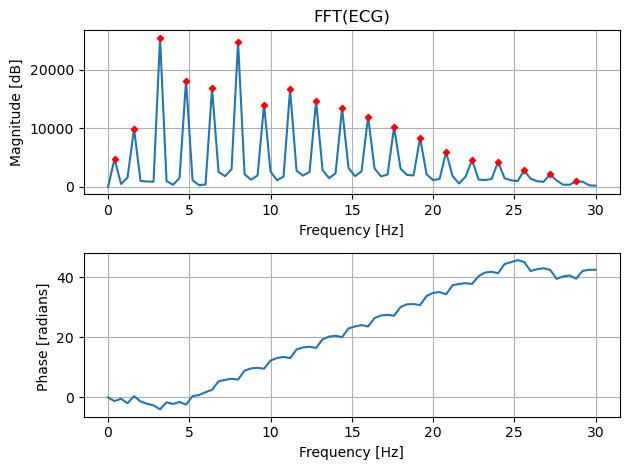

In [73]:
from functions.lab_functions import plot_spec_peaks

f_step = np.arange(0, fsamp, (fsamp/Nsamp))
y = fft(ecg_no_dc)

# Limit spectrum (zoom-in to the range)
f_max = 30 # Set the upper limit of the spectrum to 20 Hz
f_max_idx = np.argmax(f_step>f_max)
y = y[0:f_max_idx]
f_step = f_step[0:f_max_idx]

plt = plot_spec_peaks(f_step, y, title='FFT(ECG)')
plt.savefig('results/ex4/ex4_ecg.pdf')
plt.show()

>**GTA Tip**
>
 The ECG signal is quasi-periodic and within each period, the heart cycles through both systole and diastole phases. In the frequency domain, you will not just see the heart rate, but also a series of successively higher frequencies called 'harmonic frequencies'. Therefore, to calculate the frequency of the heart, you first need to detect the multiple peaks generated in the frequency domain which will all be multiples of the fundamental frequency, $F_0$ (i.e. 1 $\text{st}$ peak = $F_0$ ; 2 $\text{nd}$ peak = $2\times F_0$;  3 $^\text{rd}$ peak = $3\times F_0$; and so on). 
>
>
>- Note that the whole ECG signal contains 4 cycles in total, thus leading to a peak at $F_0/4$ due to time-periodicity of the entire signal caused by sampling in the frequency domain.

# More Real-World Examples

### Unknown Signal
To test how much you have understood so far, you are given an unknown signal, `unknown.mat`. The file contains 1000 data samples. It is also known that the signal was sampled at 1 kHz and contains one or more significant sine waves.  

You can load the data into a vector using the Python command:

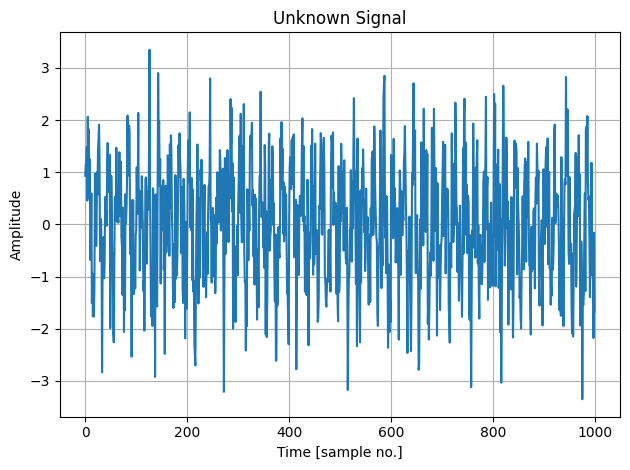

In [25]:
from functions.lab_functions import load
import IPython.display as ipd

unknown = load('files/unknown.mat', 'unknown')
plot_signal(unknown, title='Unknown Signal', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 4.17**: Take at least two different segments. Each segment contains 256 samples of data, starting at different chosen starting sample indices, and compare their magnitude and phase spectra. Are they essentially the same? Make sure that you can interpret the frequency axis. Deduce the frequency and magnitude of its constituent sine waves. 

In [19]:
# add code here

### Piano Example
Now let us see how windowing is used in a real world example. Have a listen to the `piano.wav` file. It is a 6 second long recording that contains 3 notes played at 2 second intervals on a grand piano. 
*(The first note is played at 0~seconds then the second note is played starting at 2 seconds and the third note is played starting at 4 seconds.)*

<audio controls src="files/piano.wav"> 
</audio>

We are now going to do the job of an electronic tuning device by using windows and the frequency domain to workout which notes are being played.

First, we need to read this '.wav' file in the following way: 

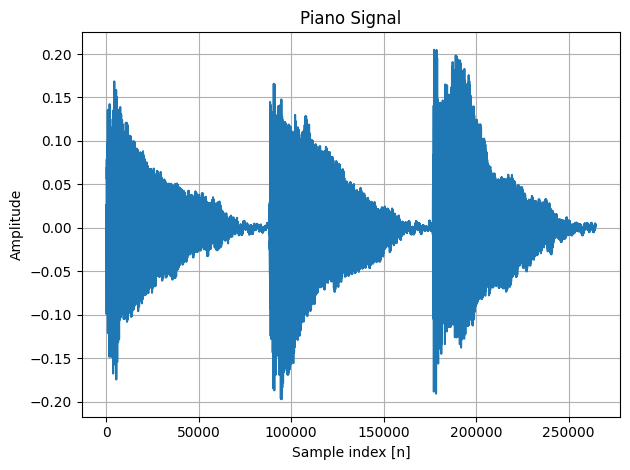

In [20]:
import soundfile as sf
data, fsamp = sf.read('files/piano.wav') 
Tsamp = 1/fsamp

plot_signal(data, title='Piano Signal', xlabel='Sample index [n]', ylabel='Amplitude')
plt.show()

To investigate the second note that was played 2.5 seconds after the start of the recording, we apply a window with the following parameters: 

```python
win_loc_sec = 2.5 # 2.5 seconds into second note
win_size_sec = 0.200  # 200 ms frame
```

We can now extract and plot this windowed data in both time- and frequency-domain using the following function:

In [21]:
from functions.lab_functions import plot_spec_peaks

def plot_piano_note(win_loc_sec, win_size_sec):

    win_loc = int(win_loc_sec/Tsamp)
    win_size = int(win_size_sec/Tsamp)

    x = data[win_loc:win_loc+win_size-1]

    Nsamp = len(x);
    t = np.arange(0, Nsamp*Tsamp, Tsamp)

    # Plot signal (frame)
    title = 'Piano Signal - '+str(win_loc_sec)+'s'
    plot_signal(t, x, title=title, xlabel='Time [s]', ylabel='Amplitude')    
    plt.show()

    X = fft(x);
    f_step = np.arange(0, fsamp, fsamp/Nsamp)

    # Limit spectrum
    f_max = 1000 # Set the upper limit of the spectrum to 20Hz
    f_max_idx = np.argmax(f_step>f_max)
    X = X[0:f_max_idx]
    f_step = f_step[0:f_max_idx]

    # Plot spectrum
    title = 'FFT(Piano Signal) - '+str(win_loc_sec)+'s'
    plot_spec_peaks(f_step, X, title=title)
    plt.savefig('results/ex4/ex4_fft_piano_'+str(win_loc_sec)+'_s.pdf')
    plt.show()

We can now run this fuction to see the plots:

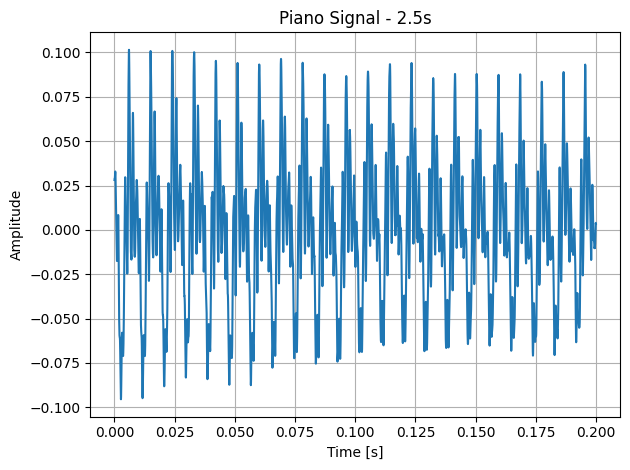

Peaks: 
5.0
25.0
110.0
220.0
330.0
445.1
555.1
665.1
775.1


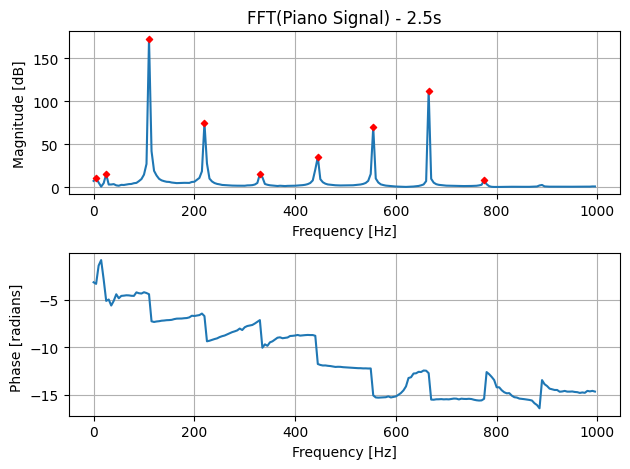

In [22]:
win_loc_sec = 2.5 # 2.5 seconds into second note
win_size_sec = 0.200  # 200 ms frame
plot_piano_note(win_loc_sec, win_size_sec)

**Question 4.18** Analysing the windowed data for the second note, find the frequency of the signal and deduce the musical note being played. For the musical notes, use scientific pitch notation as tabulated here: <https://en.wikipedia.org/wiki/Piano_key_frequencies>.

>**GTA Tip**
>
>Recall what we learned about harmonics from the ECG example. 

**Question 4.19**  See if you can work out the other 2 notes that were played.

>**Hint**: use `winlocsec  = 0.5` (0.5  seconds into the 1$\text{st}$ note), `winlocsec  = 2.5` (0.5  seconds  into the 2$\text{nd}$ note) and `winlocsec  = 4.5` (0.5  seconds  into the 3$\text{rd}$ note) 
